In [1]:
from dataset_2  import *
from PCA import *

    Principal Component Analysis (PCA)


El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad que identifica un conjunto de ejes ortogonales, llamados componentes principales, que capturan la máxima varianza en los datos. Los componentes principales son combinaciones lineales de las variables originales del conjunto de datos y se ordenan en orden decreciente de importancia. Se asume que la información se encuentra en la varianza de las características, es decir, cuanto mayor sea la variación en una característica, más información contiene esa característica. 

**Paso 1: Estandarización**
Primero, necesitamos estandarizar nuestro conjunto de datos para asegurar que cada variable tenga una media de 0 y una desviación estándar de 1.

\begin{equation*}
Z = \frac{X - \mu}{\sigma}
\end{equation*}

Aquí,

$\mu$ es la media de las características independientes $\mu = \left\{ \mu_1, \mu_2, \cdots, \mu_m \right\}$ \\
$\sigma$ es la desviación estándar de las características independientes $\sigma = \left\{ \sigma_1, \sigma_2, \cdots, \sigma_m \right\}$

**Paso 2: Cálculo de la Matriz de Covarianza**

La covarianza mide la fuerza de la variabilidad conjunta entre dos o más variables, indicando cuánto cambian en relación entre sí. Para encontrar la covarianza, podemos usar la fórmula:

\begin{equation*}
\text{cov}(x_1, x_2) = \frac{\sum_{i=1}^{n}(x_{1i} - \bar{x}_1)(x_{2i} - \bar{x}_2)}{n - 1}
\end{equation*}


**Paso 3: Cálculo de Valores y Vectores Propios de la Matriz de Covarianza para Identificar los Componentes Principales**

Sea $A$ una matriz cuadrada de $n \times n$ y $X$ un vector no nulo para el cual 

\begin{equation*}
AX = \lambda X
\end{equation*}

para algunos valores escalares $\lambda$. Entonces, $\lambda$ es conocido como el valor propio de la matriz $A$ y $X$ es conocido como el vector propio de la matriz $A$ para el valor propio correspondiente.

También se puede escribir como:

\begin{equation*}
AX - \lambda X = 0 
\end{equation*}

\begin{equation*}
(A - \lambda I)X = 0
\end{equation*}

donde $I$ es la matriz identidad de la misma dimensión que la matriz $A$. Y las condiciones anteriores serán verdaderas solo si $A - \lambda I$ es no invertible (es decir, una matriz singular). Eso significa,

$
|A - \lambda I| = 0
$

A partir de la ecuación anterior, podemos encontrar los valores propios $\lambda$ y, por lo tanto, el vector propio correspondiente se puede encontrar usando la ecuación $AX = \lambda X$.


**Obtención y estandarización de los datos**

In [4]:
standardize_data = get_standardize_data("MNIST_dataset.csv")
model_PCA= PCA(standardize_data)

components_values = range(1,800,25)
mse_errors = []


In [3]:
for n_components in components_values:
    model_PCA.transform(n_components)
    mse = model_PCA.get_MSE(n_components)
    mse_errors.append(mse)


**Variación del error cuadrático medio de reconstrucción en función de la cantidad de componentes principales utilizados**

Para observar el error de reconstrucción de las imágenes con la cantidad de componentes utilizados, se utiliza el siguiente cálculo del Error Cuadrático Medio (MSE):

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{X}_i)^2
\end{equation}

Donde $n$ es el número de muestras, $X_i$ representa la muestra original, y $\hat{X}_i$ es la muestra reconstruida utilizando el número correspondiente de componentes principales.


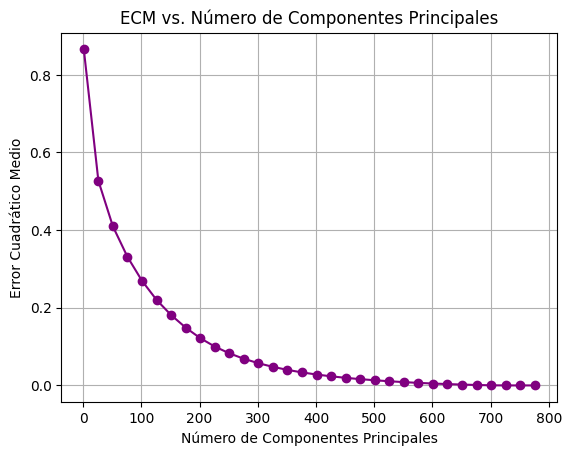

In [4]:

plot_MSE(components_values, mse_errors)


Se observa que 'el codo' de la curva se encuentra para la cantidad entre 100-200 autovalores, por lo que esta será la cantidad de autovalores que se evaluarán para probar los resultados de la reconstrucción.

In [2]:
data = get_data2("MNIST_dataset.csv")

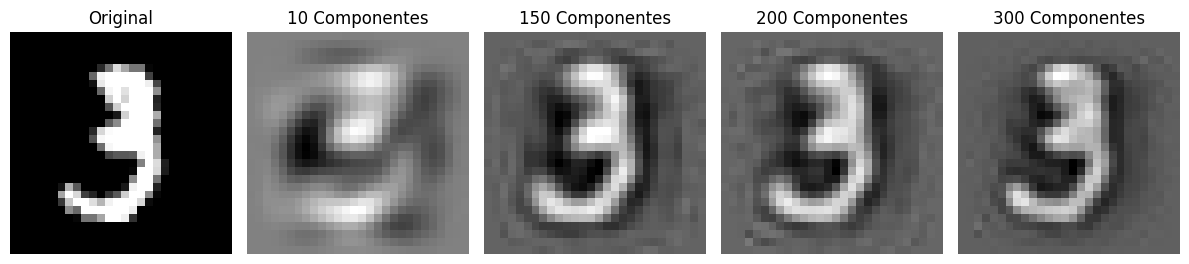

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(data[9].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')
for i, n_components in enumerate([10, 150, 200, 300], start=2):
    model_PCA.transform(n_components)
    reconstructed_image = model_PCA.inverse_transform(n_components)[9]
    
    plt.subplot(1, 5, i)
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    plt.title(f'{n_components} Componentes')
    plt.axis('off')

plt.tight_layout()
plt.show()


Para determinar la cantidad óptima de componentes principales a utilizar, se lleva a cabo un análisis de las imágenes reconstruidas con diferentes cantidades de componentes. Se observa que a partir de 150 componentes, la imagen resultante es lo suficientemente discernible, y que más allá de este valor, las reconstrucciones son muy similares entre sí. Por lo tanto, esta es la cantidad óptima de componentes principales a utilizar.

    2.b

A continuación, se muestran diez fotos del dataset original, sin normalizar, y la recontrucción con el dataset normalizado y 150 componentes principales utilizados.

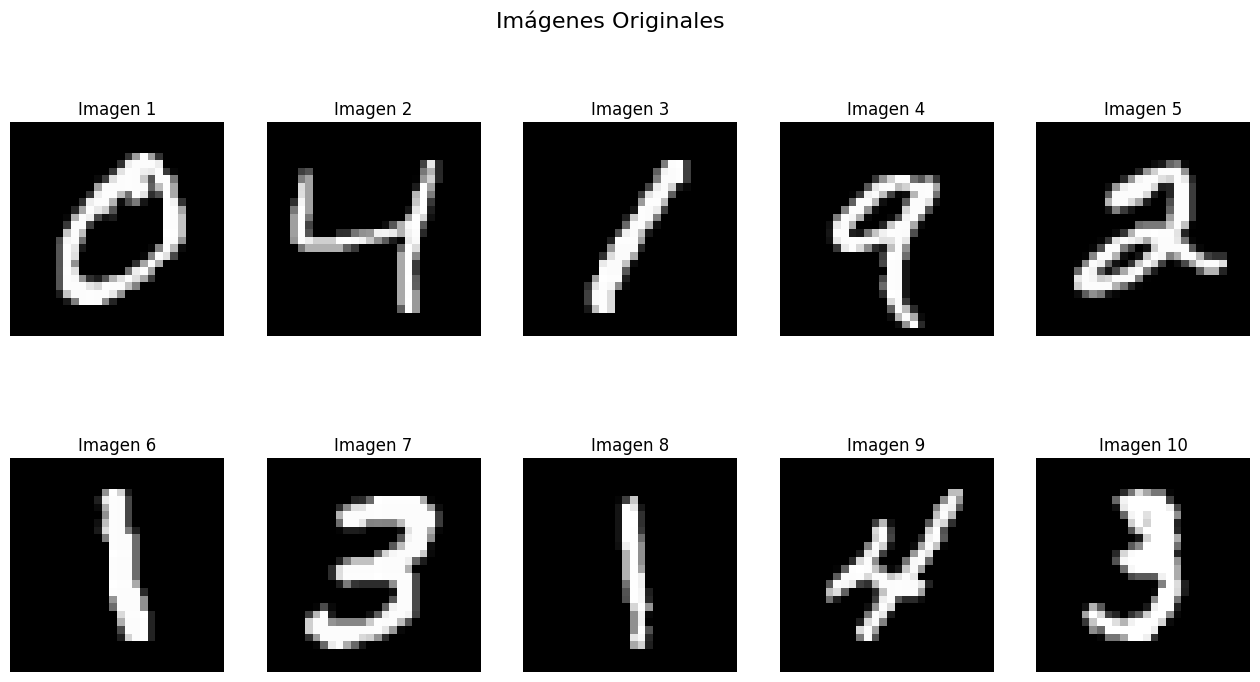

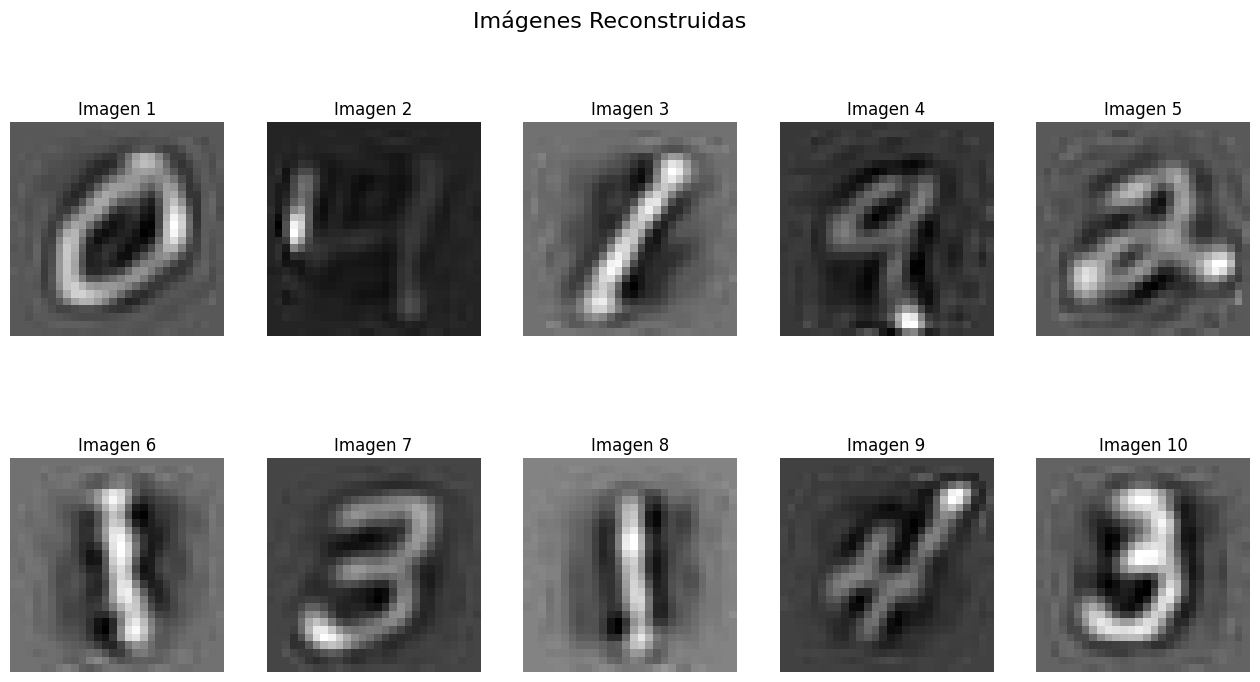

In [5]:
n_components = 150 # Cantidad de componentes principales
transformed_data = model_PCA.transform(n_components)
reconstructed_images = model_PCA.inverse_transform(n_components)

plot_images(data[:10], title="Imágenes Originales")
plot_images(reconstructed_images[:10], title="Imágenes Reconstruidas")

Finalmente, se observa que algunas imágenes son más distinguibles que otras en la reconstrucción, pero en términos generales, todas logran preservar la esencia de la imagen con mucha menos información. Es importante destacar que se redujo a menos de un tercio la cantidad de componentes a utilizar, lo cual sugiere que había muchos datos que no aportaban información relevante a la comprensión de la imagen.

Además, cabe resaltar que algunas imágenes presentan siluetas mucho más complejas, como es el caso de la imagen 2 donde el número es poco distinguible a primera vista y la reconstrucción posterior resulta más confusa que en otros casos. Este problema podría quizás solucionarse tomando una mayor cantidad de componentes principales. Sin embargo, con el propósito de reducir al máximo la cantidad de componentes a utilizar y preservar en promedio la comprensión de todos los números, no se toma en cuenta un caso tan excepcional.